In [52]:
import pandas as pd

In [53]:
data = pd.read_csv('housingData.csv',sep=",") #sep表示以什么分割，
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [54]:
# 检查缺失值
missing_values = data.isnull().sum()

# 显示每列的缺失值数量
print(missing_values)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [55]:
# 均值填充数值列
num_cols = ['ZN', 'INDUS', 'AGE', 'DIS', 'LSTAT']
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# 众数填充分类列 CHAS
data['CHAS'] = data['CHAS'].fillna(data['CHAS'].mode()[0])


In [56]:
print("是否还存在缺失值：")
print(data.isnull().sum())

是否还存在缺失值：
CRIM       20
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64


In [57]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,22.921051,6.699165,0.250605,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.560263,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
data = data.apply(pd.to_numeric, errors='coerce')

In [59]:
print("房价最大值:",data['MEDV'].max())
print("房价最低值:",data['MEDV'].min())
print("房价平均值:",data['MEDV'].mean())

房价最大值: 50.0
房价最低值: 5.0
房价平均值: 22.532806324110677


In [60]:
from matplotlib import pyplot as plt

cor_data = data[:].corr()
cor_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.186953,0.399188,-0.055323,0.417130,-0.219150,0.353363,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.440251,-0.391363
ZN,-0.186953,1.000000,-0.513336,-0.034471,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.399188,-0.513336,1.000000,0.054172,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.055323,-0.034471,0.054172,1.000000,0.070867,0.106797,0.073549,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047808,0.183844
NOX,0.417130,-0.502287,0.740965,0.070867,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.219150,0.316550,-0.381457,0.106797,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.353363,-0.541274,0.614592,0.073549,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.374166,0.638388,-0.699639,-0.092318,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.624765,-0.306316,0.593176,-0.003339,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.580595,-0.308334,0.716062,-0.035822,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


C:\Users\Administrator\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.draw()
C:\Users\Administrator\PycharmProjects\pythonProject\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


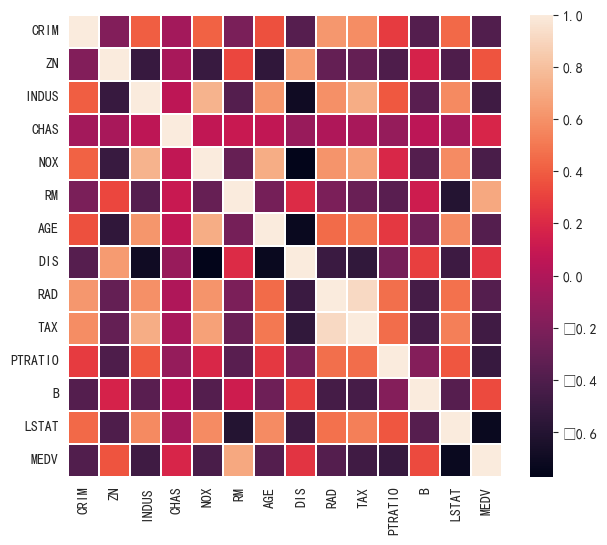

In [61]:
import seaborn as sns 

plt.subplots(figsize = (7,6)) #c创建子图并设定长和宽大小
ax = sns.heatmap(cor_data, linewidth=0.2) #传入相关系数cor_data，设置线条大小为0.2
plt.show()

In [62]:
x = data.drop(columns=['MEDV'])
y = data[['MEDV']]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [64]:
from sklearn.preprocessing import StandardScaler  #数据标准化模块

st= StandardScaler()   #实例化

# fit_transform() 适用于训练数据集，计算训练集的均值和标准差，并进行转换。
# transform() 仅适用于测试数据集，使用训练集的均值和标准差进行转换。

X_train= st.fit_transform(X_train)  
X_test = st.transform(X_test)


X_train

array([[-0.36652131, -0.48994464, -0.4560692 , ...,  1.18880212,
         0.43987709, -0.66879623],
       [-0.41939349,  0.581666  , -0.90625227, ...,  0.58247746,
         0.231398  ,  0.19813291],
       [ 0.69470041, -0.48994464,  1.03357313, ...,  0.81567925,
         0.43987709,  1.15203552],
       ...,
       [ 0.23859022, -0.48994464,  1.03357313, ...,  0.81567925,
         0.43987709,  0.8897123 ],
       [-0.40107032, -0.48994464, -0.74622042, ..., -0.49025077,
         0.21666488, -0.30126316],
       [-0.42996331, -0.48994464, -0.78211541, ...,  0.34927567,
         0.43987709, -0.59725353]])

In [65]:
# 防止数据泄露（Data Leakage），建议用训练集的统计量填充测试集（而非测试集自身的统计量）
import numpy as np
# 计算训练集的统计量（X 和 y）
X_train_mean = np.nanmean(X_train, axis=0)  # X 每列的均值
y_train_mean = np.nanmean(y_train)          # y 的均值（无需 axis=0）

# 用训练集的统计量填充训练集和测试集
X_train = np.nan_to_num(X_train, nan=X_train_mean)
X_test = np.nan_to_num(X_test, nan=X_train_mean)  # 测试集用训练集的均值！
y_train = np.nan_to_num(y_train, nan=y_train_mean)
y_test = np.nan_to_num(y_test, nan=y_train_mean)  # 同上

In [66]:
from sklearn.linear_model import LinearRegression  #线性模型导入线性回归
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import numpy as np
model = LinearRegression() #实例化模型
model.fit(X_train, y_train) #采用fit方法，拟合回归系数和截距
y_pred = model.predict(X_test)#模型预测

print('截距：',model.intercept_[0])   #输出截距
print('回归系数：',model.coef_[0])   #输出系数   
print('R^2: {}'.format(model.score(X_test, y_test)))# 使用score函数计算r^2值
print("R2=",r2_score(y_test, y_pred))#使用r2_score计算模型评价,r^2决定系数值。两者效果一样。
print('平均绝对误差：',metrics.mean_absolute_error(y_test,y_pred)) #MAE
print('均方误差：',metrics.mean_squared_error(y_test,y_pred))  #MSE
print('均方根误差：',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))  #EMSE,开平方

截距： 22.33983050847458
回归系数： [-0.98432001  1.37153227  0.00680933  0.7633153  -2.42476049  2.1428398
 -0.4570618  -3.53751533  2.4664878  -1.67646859 -2.11979265  0.55328457
 -3.55340243]
R^2: 0.7672129961987066
R2= 0.7672129961987066
平均绝对误差： 3.477776025639452
均方误差： 21.335973437372434
均方根误差： 4.61908794432109


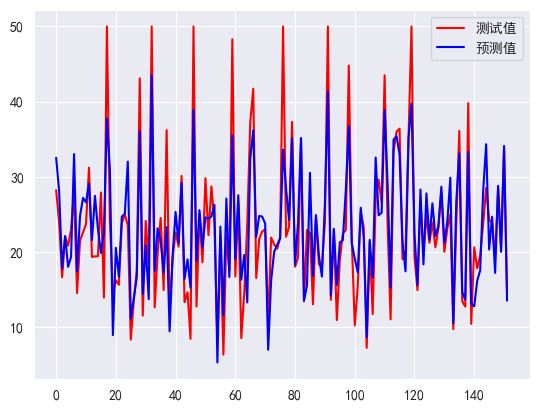

In [67]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体，支持中文
# 画图：y_test 为测试值，y_pred 为预测值
plt.plot(y_test, c="r", label="测试值")
plt.plot(y_pred, c="b", label="预测值")

# 添加图例
plt.legend()

# 显示图像
plt.show()

In [68]:
# !pip install xgboost